# Exam 1
# MSBA 207
# October 2023

<pre>You must sign this Honor Code Statement before taking the Exam:  

I, Samuel Wolfe, agree to neither give nor receive any help on this exam from any other student or person. I understand that providing answers to questions on this exam to any other student or person is an academic misconduct violation as is taking or receiving answers to questions on this exam from any other student or person. I understand that use of any source or communication via the internet or network (including discord message, text message, email, online search, ChatGPT) on this exam is an academic misconduct violation. It is important to me to be a person of integrity and that means that ALL ANSWERS on this exam are my answers. I understand any academic misconduct violation will be dealt with following Academic Honesty Policy and Procedure. 

Signed Samuel Wolfe (Type your name here as your signature) </pre>

Answer the following questions based on the lectures, textbooks, and code provided by Prof. Min Li for the course, not any other source such as the Internet or other people.

The dataset framingham.csv is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict the patient risk of coronary heart disease (CHD) in 10 years.The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes. Save this Jupyter notebook (.ipynb) file including your Python code, output, and answers ("Markdown" format) and submit it in Canvas. Also submit the R code and results (in Word, pdf, or R markdown Knit to html) in canvas. The data dictionary is provided below:

<pre>coronary heart disease
• Sex: male or female (Nominal)

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

• Current Smoker: whether or not the patient is a current smoker (Nominal)

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal)

• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)

• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous)

• Dia BP: diastolic blood pressure (Continuous)

• BMI: Body Mass Index (Continuous)

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)

• Glucose: glucose level (Continuous)

• TenYearCHD: coronary heart disease in 10 years (binary: “1”, means “Yes”, “0” means “No”)
</pre>

In [1]:
%matplotlib inline
from pathlib import Path
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.neural_network import MLPClassifier, MLPRegressor
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score
import math
import scikitplot as skplt

In [2]:
# Working directory:
#
# We assume that data are kept in the same directory as the notebook. If you keep your 
# data in a different folder, replace the argument of the `Path`
DATA = Path('E:/Aliit/School/MSBA/207/MSBA-207/Tests/')
# DATA = Path('C:/Users/user/data/')
# and then load data using 
#
# pd.read_csv(DATA / ‘filename.csv’)

In [3]:
df = pd.read_csv(DATA / 'framingham.csv')

In [4]:
df.dtypes

male                 int64
age                  int64
education          float64
currentSmoker        int64
cigsPerDay         float64
BPMeds             float64
prevalentStroke      int64
prevalentHyp         int64
diabetes             int64
totChol            float64
sysBP              float64
diaBP              float64
BMI                float64
heartRate          float64
glucose            float64
TenYearCHD           int64
dtype: object

In [5]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

df.info() shows many missing (null) values.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4240 non-null   int64  
 1   age              4240 non-null   int64  
 2   education        4135 non-null   float64
 3   currentSmoker    4240 non-null   int64  
 4   cigsPerDay       4211 non-null   float64
 5   BPMeds           4187 non-null   float64
 6   prevalentStroke  4240 non-null   int64  
 7   prevalentHyp     4240 non-null   int64  
 8   diabetes         4240 non-null   int64  
 9   totChol          4190 non-null   float64
 10  sysBP            4240 non-null   float64
 11  diaBP            4240 non-null   float64
 12  BMI              4221 non-null   float64
 13  heartRate        4239 non-null   float64
 14  glucose          3852 non-null   float64
 15  TenYearCHD       4240 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 530.1 KB


In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4135.000000,4240.000000,4211.000000,4187.000000,4240.000000,4240.000000,4240.000000,4190.000000,4240.000000,4240.000000,4221.000000,4239.000000,3852.000000,4240.000000
mean,0.429245,49.580189,1.979444,0.494104,9.005937,0.029615,0.005896,0.310613,0.025708,236.699523,132.354599,82.897759,25.800801,75.878981,81.963655,0.151887
std,0.495027,8.572942,1.019791,0.500024,11.922462,0.169544,0.076569,0.462799,0.158280,44.591284,22.033300,11.910394,4.079840,12.025348,23.954335,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,90.000000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


Replace the missing values by the mean.

In [8]:
df.shape

(4240, 16)

In [9]:
df.dropna().shape

(3658, 16)

In [10]:
df = df.fillna(round(df.mean()))

In [11]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,0.429245,49.580189,1.979953,0.494104,9.005896,0.029245,0.005896,0.310613,0.025708,236.703066,132.354599,82.897759,25.801693,75.879009,81.966981,0.151887
std,0.495027,8.572942,1.007087,0.500024,11.881610,0.168513,0.076569,0.462799,0.158280,44.327533,22.033300,11.910394,4.070708,12.023930,22.831751,0.358953
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.410000,75.000000,80.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [12]:
df.TenYearCHD.value_counts()

TenYearCHD
0    3596
1     644
Name: count, dtype: int64

## (1) What is the proportion of patients with 10-year risk of future coronary heart disease (CHD) in the data?

In [13]:
print('The proportion is:',round(644/(644+3596),2))


The proportion is: 0.15


## (2) Partition the data into training (80%) and validation (20%) sets.

In [14]:
df['male'] = df['male'].astype('category')
df['education'] = df['education'].astype('category')
df['currentSmoker'] = df['currentSmoker'].astype('category')
df['BPMeds'] = df['BPMeds'].astype('category')
df['prevalentStroke'] = df['prevalentStroke'].astype('category')
df['prevalentHyp'] = df['prevalentHyp'].astype('category')
df['diabetes'] = df['diabetes'].astype('category')
df['TenYearCHD'] = df['TenYearCHD'].astype('category')
print(df.dtypes)

male               category
age                   int64
education          category
currentSmoker      category
cigsPerDay          float64
BPMeds             category
prevalentStroke    category
prevalentHyp       category
diabetes           category
totChol             float64
sysBP               float64
diaBP               float64
BMI                 float64
heartRate           float64
glucose             float64
TenYearCHD         category
dtype: object


In [15]:
predictors = df.drop(columns='TenYearCHD').columns.to_list()
outcome = 'TenYearCHD'

In [16]:
df_dum = pd.get_dummies(df[predictors], drop_first=True, dtype='uint8')
predictors = df_dum.columns.to_list()
df_dum[outcome] = df[outcome]

In [17]:
df_dum.dtypes

age                     int64
cigsPerDay            float64
totChol               float64
sysBP                 float64
diaBP                 float64
BMI                   float64
heartRate             float64
glucose               float64
male_1                  uint8
education_2.0           uint8
education_3.0           uint8
education_4.0           uint8
currentSmoker_1         uint8
BPMeds_1.0              uint8
prevalentStroke_1       uint8
prevalentHyp_1          uint8
diabetes_1              uint8
TenYearCHD           category
dtype: object

In [18]:
X = df_dum[predictors]
X = sm.add_constant(X, prepend=True)
y = df_dum[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)
train_X

,const,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_1,education_2.0,education_3.0,education_4.0,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
2161,1.0,48,1.0,259.0,130.0,95.0,23.68,68.0,82.0,1,0,0,0,1,0,0,0,0
133,1.0,56,20.0,246.0,128.0,64.0,25.54,92.0,92.0,0,1,0,0,1,0,0,0,0
3124,1.0,51,0.0,198.0,142.5,80.0,23.86,76.0,100.0,0,0,1,0,0,0,0,1,0
2473,1.0,66,1.0,261.0,154.0,97.0,32.60,70.0,81.0,0,0,0,0,1,1,0,1,0
3879,1.0,40,40.0,334.0,120.0,77.0,22.66,82.0,92.0,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,1.0,45,30.0,181.0,138.5,90.0,26.32,90.0,82.0,0,1,0,0,1,0,0,1,0
2763,1.0,46,9.0,255.0,113.5,72.5,23.22,60.0,82.0,1,0,0,0,1,0,0,0,0
905,1.0,38,20.0,309.0,148.0,109.0,30.85,95.0,82.0,1,1,0,0,1,0,0,1,0
3980,1.0,55,0.0,273.0,125.0,80.0,23.05,85.0,67.0,0,1,0,0,0,0,0,0,0


In [19]:
valid_X

,const,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose,male_1,education_2.0,education_3.0,education_4.0,currentSmoker_1,BPMeds_1.0,prevalentStroke_1,prevalentHyp_1,diabetes_1
534,1.0,36,0.0,182.0,145.0,102.0,30.92,72.0,70.0,1,0,0,0,0,0,0,1,0
2751,1.0,39,20.0,285.0,120.0,77.5,28.33,95.0,79.0,1,1,0,0,1,0,0,0,0
3599,1.0,44,20.0,270.0,167.5,92.5,21.28,85.0,77.0,0,1,0,0,1,0,0,1,0
518,1.0,35,20.0,231.0,122.0,72.5,22.78,72.0,93.0,1,1,0,0,1,0,0,0,0
3813,1.0,44,0.0,257.0,129.0,93.0,27.56,75.0,76.0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1649,1.0,43,0.0,231.0,155.5,99.5,34.95,68.0,274.0,0,0,0,0,0,0,0,1,1
4172,1.0,58,0.0,223.0,154.5,88.0,27.91,69.0,81.0,1,0,0,1,0,0,0,1,0
2401,1.0,37,10.0,156.0,120.0,87.0,21.80,66.0,89.0,0,0,0,1,1,0,0,0,0
3475,1.0,40,0.0,156.0,110.0,74.0,20.79,56.0,76.0,0,0,0,0,0,0,0,0,0


## (3) Fit logistic regression to the training data using <i>sm.glm</i> in statsmodels. Include all of the features (predictors) as input in logistic regression.

In [20]:
logit_full1 = sm.GLM(train_y, train_X, family=sm.families.Binomial())
logit_result1 = logit_full1.fit()
logit_result1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                            GLM   Df Residuals:                     3374
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1284.2
Date:                Mon, 23 Oct 2023   Deviance:                       2568.4
Time:                        20:53:48   Pearson chi2:                 3.44e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08929
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.9125      0.735    -10.765      0.000      -9.353      -6.472
age                   0.0541      0.007      7.689      0.000       0.040       0.068
cigsPerDay            0.0212      0.006      3.395      0.001       0.009       0.033
totChol               0.0020      0.001      1.766      0.077      -0.000       0.004
sysBP                 0.0159      0.004      4.013      0.000       0.008       0.024
diaBP                -0.0063      0.007     -0.939      0.348      -0.019       0.007
BMI                   0.0055      0.013      0.413      0.680      -0.021       0.032
heartRate            -0.0002      0.004     -0.038      0.970      -0.009       0.008
glucose               0.0072      0.002      2.949      0.003       0.002       0.012
male_1                0.5841      0.113      5.181      0.000       0.363       0.805
education_2.0        -0.1912      0.126     -1.521      0.128      -0.437       0.055
education_3.0        -0.0297      0.155     -0.191      0.848      -0.334       0.275
education_4.0         0.0372      0.171      0.217      0.828      -0.299       0.373
currentSmoker_1       0.0118      0.160      0.074      0.941      -0.302       0.326
BPMeds_1.0            0.3348      0.240      1.394      0.163      -0.136       0.806
prevalentStroke_1     0.2876      0.589      0.488      0.625      -0.867       1.442
prevalentHyp_1        0.2377      0.145      1.644      0.100      -0.046       0.521
diabetes_1            0.1784      0.323      0.553      0.581      -0.454       0.811
=====================================================================================
"""

## (4) Write the estimated equation that associates the outcome variable with the predictors in three formates (include only the first and last predictor with "..." in between): <br>
### i. The logit as a function of all predictors

#### -7.9125+0.0541\*X1+...+0.1784\*X15

### ii. The odds as a function of all predictors

#### e^-7.9125+0.0541\*X1+...+0.1784\*X15

### iii. The probability as a function of all predictors

#### 1/1+e^-(-7.9125+0.0541\*X1+...+0.1784\*X15)

In [21]:
logit_result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                            GLM   Df Residuals:                     3374
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1284.2
Date:                Mon, 23 Oct 2023   Deviance:                       2568.4
Time:                        20:53:48   Pearson chi2:                 3.44e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08929
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.9125      0.735    -10.765      0.000      -9.353      -6.472
age                   0.0541      0.007      7.689      0.000       0.040       0.068
cigsPerDay            0.0212      0.006      3.395      0.001       0.009       0.033
totChol               0.0020      0.001      1.766      0.077      -0.000       0.004
sysBP                 0.0159      0.004      4.013      0.000       0.008       0.024
diaBP                -0.0063      0.007     -0.939      0.348      -0.019       0.007
BMI                   0.0055      0.013      0.413      0.680      -0.021       0.032
heartRate            -0.0002      0.004     -0.038      0.970      -0.009       0.008
glucose               0.0072      0.002      2.949      0.003       0.002       0.012
male_1                0.5841      0.113      5.181      0.000       0.363       0.805
education_2.0        -0.1912      0.126     -1.521      0.128      -0.437       0.055
education_3.0        -0.0297      0.155     -0.191      0.848      -0.334       0.275
education_4.0         0.0372      0.171      0.217      0.828      -0.299       0.373
currentSmoker_1       0.0118      0.160      0.074      0.941      -0.302       0.326
BPMeds_1.0            0.3348      0.240      1.394      0.163      -0.136       0.806
prevalentStroke_1     0.2876      0.589      0.488      0.625      -0.867       1.442
prevalentHyp_1        0.2377      0.145      1.644      0.100      -0.046       0.521
diabetes_1            0.1784      0.323      0.553      0.581      -0.454       0.811
=====================================================================================
"""

## (5) BPMeds represents whether or not the patient was on blood pressure medication.  Quantify the effect of BPMeds on the risk of coronary heart disease in 10 years. Interpret clearly using the results from the logistic regression you just fit.  

#### Looking at BPMeds we see that its coef is 0.3348 which normally means for every unit increase of BPMeds the odds of coronary heart disease in 10 years goes up by that amount. But looking at its P score, we see that it is 0.163, which is greater than the statistically significant average for p scores of P < 0.05. This indicates that the value of BPMeds on predicting the outcome of coronary heart disease in 10 years is not as high. I believe its important to note that BPMeds is a binary value, either the patient was on them or not. 

In [22]:
logit_result1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             TenYearCHD   No. Observations:                 3392
Model:                            GLM   Df Residuals:                     3374
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1284.2
Date:                Mon, 23 Oct 2023   Deviance:                       2568.4
Time:                        20:53:48   Pearson chi2:                 3.44e+03
No. Iterations:                     6   Pseudo R-squ. (CS):            0.08929
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -7.9125      0.735    -10.765      0.000      -9.353      -6.472
age                   0.0541      0.007      7.689      0.000       0.040       0.068
cigsPerDay            0.0212      0.006      3.395      0.001       0.009       0.033
totChol               0.0020      0.001      1.766      0.077      -0.000       0.004
sysBP                 0.0159      0.004      4.013      0.000       0.008       0.024
diaBP                -0.0063      0.007     -0.939      0.348      -0.019       0.007
BMI                   0.0055      0.013      0.413      0.680      -0.021       0.032
heartRate            -0.0002      0.004     -0.038      0.970      -0.009       0.008
glucose               0.0072      0.002      2.949      0.003       0.002       0.012
male_1                0.5841      0.113      5.181      0.000       0.363       0.805
education_2.0        -0.1912      0.126     -1.521      0.128      -0.437       0.055
education_3.0        -0.0297      0.155     -0.191      0.848      -0.334       0.275
education_4.0         0.0372      0.171      0.217      0.828      -0.299       0.373
currentSmoker_1       0.0118      0.160      0.074      0.941      -0.302       0.326
BPMeds_1.0            0.3348      0.240      1.394      0.163      -0.136       0.806
prevalentStroke_1     0.2876      0.589      0.488      0.625      -0.867       1.442
prevalentHyp_1        0.2377      0.145      1.644      0.100      -0.046       0.521
diabetes_1            0.1784      0.323      0.553      0.581      -0.454       0.811
=====================================================================================
"""

## (6) Quantify the effect of the number of cigarettes that the person smoked on average in one day on the risk of coronary heart disease in 10 years. Interpret clearly using the results from the logistic regression you just fit.  

#### Looking at cigsPerDay we see its coef is 0.0212. This means that for every unit increase in cigsPerDay the odds of coronary heart disease go up by that amount. As cigsPerDay is an integer uniquely calculated for every individual, this number has a varying impact, likely increasing in impact value for every cigPerDay. Looking at the P score of cigsPerDay we see its 0.001, much less than the P Score barrier of 0.05. This means cigsPerDay has significant impact on the outcome of Coronary Heart Disease.

## (7) Compare the overall accuracy based on training and validation data.  Produce the gains and lift charts based on the validation data.  Interpret the gains and lift charts.

#### Predictably the training set has a higher accuracy over the validation set. But the much smaller validation set did still perform remarkably close to the training set in overall accuracy.

In [23]:
pred_all = logit_result1.predict(train_X)
predictions_all = [0 if x < 0.5 else 1 for x in pred_all]
classificationSummary(train_y, predictions_all)

Confusion Matrix (Accuracy 0.8564)

       Prediction
Actual    0    1
     0 2860   18
     1  469   45


In [24]:
pred_all = logit_result1.predict(valid_X)
predictions_all = [0 if x < 0.5 else 1 for x in pred_all]
classificationSummary(valid_y, predictions_all)

Confusion Matrix (Accuracy 0.8479)

       Prediction
Actual   0   1
     0 713   5
     1 124   6


In [25]:
logit_result1_predict = logit_result1.predict(valid_X)
logit_result1_predict_df = pd.DataFrame(logit_result1_predict)
logit_result1_predict_df['Predicted'] = logit_result1_predict_df[0]

#### not sure what happened but I had a script to allow me to turn a .predict into a 0 or 1 based on a cutoff value, but its gone from anything I have currently available to me. I have commented out my terrible attempt to recreate it and may come back to it if I have the time.

In [26]:
predictions_all = [0 if x < 0.5 else 1 for x in logit_result1_predict]

In [27]:
full_result = pd.DataFrame({'actual': valid_y, 
                            #'p(0)': [p[0] for p in predictions_all],
                            #'p(1)': [p[1] for p in predictions_all],
                            'predicted': logit_result1.predict(valid_X)})
for x in full_result.index:
    #full_result['p(0)']
    break
#full_result = full_result.sort_values(by=['p(1)'], ascending=False)

#ax = gainsChart(full_result.actual, label='Full model', color='C1', figsize=[5, 5])
#ax.legend()

#plt.show()

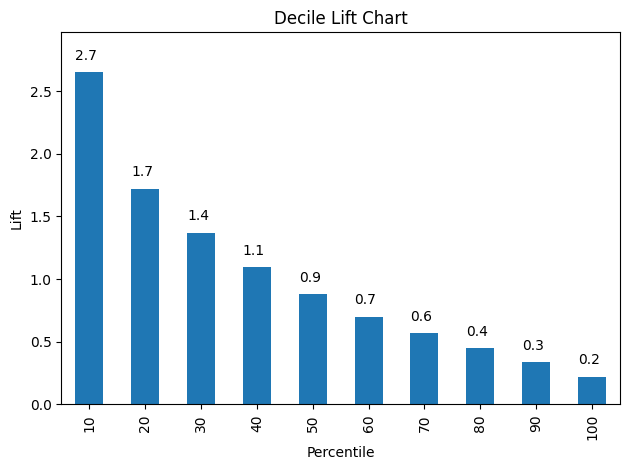

In [28]:
#logit_result1_predict_df = logit_result1_predict_df.drop(columns=[0,1])
logit_result1_Results = pd.DataFrame({'Predicted': logit_result1_predict_df['Predicted'], 'Actual': valid_y})
liftChart(logit_result1_Results.sort_values(by=['Predicted'], ascending=False).Predicted, labelBars=True, title='Decile Lift Chart')
plt.tight_layout()
plt.show()

## (8) Standardize all predictors based on the training data. Try an automated feature selection method by using regularization with L1 penalty (<i>lasso</i>) through sklearn method <i>LogisticRegressionCV</i>. Set the number of folds to 10, i.e., cv=10. Include the following options: random_state=1, tol=1e-8, max_iter=10000. Write down the Python code and the output.

In [29]:
# Initiate scaler
sc = StandardScaler()
# Standardize the training dataset
train_X_transformed = pd.DataFrame(sc.fit_transform(train_X),index=train_X.index, columns=train_X.columns)
# Standardized the testing dataset
valid_X_transformed = pd.DataFrame(sc.transform(valid_X),index=valid_X.index, columns=valid_X.columns)
# Summary statistics after standardization
train_X_transformed.describe().T

,count,mean,std,min,25%,50%,75%,max
const,3392.0,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
age,3392.0,-3.142141e-17,1.000147,-2.065513,-0.897440,-0.079788,0.854670,2.373165
cigsPerDay,3392.0,8.797994e-17,1.000147,-0.755311,-0.755311,-0.755311,0.916641,5.096520
totChol,3392.0,2.848874e-16,1.000147,-2.649585,-0.689854,-0.059136,0.571582,10.347710
sysBP,3392.0,-3.980045e-16,1.000147,-2.222135,-0.694857,-0.193363,0.513288,5.277485
diaBP,3392.0,-3.707726e-16,1.000147,-2.767225,-0.658048,-0.067479,0.523091,4.825811
BMI,3392.0,3.613462e-16,1.000147,-2.520894,-0.665466,-0.093047,0.548457,6.297323
heartRate,3392.0,-5.197624e-16,1.000147,-2.658030,-0.665957,-0.084936,0.579088,5.559270
glucose,3392.0,2.890769e-16,1.000147,-1.909609,-0.439635,-0.095110,0.157542,14.351975
male_1,3392.0,-1.990022e-17,1.000147,-0.859934,-0.859934,-0.859934,1.162879,1.162879


In [30]:
logit_reg_CV_L1 = LogisticRegressionCV(Cs=20, max_iter=10000, penalty='l1', solver='liblinear', cv=10, random_state=1, tol=1e-8)
logit_reg_CV_L1.fit(train_X_transformed, train_y)

LogisticRegressionCV(Cs=20, cv=10, max_iter=10000, penalty='l1', random_state=1,
                     solver='liblinear', tol=1e-08)

#### Report the value of the penalty parameter C. 

In [31]:
print('C:', logit_reg_CV_L1.C_)

C: [0.61584821]


### Convert C to the more common notation lambda used for the lasso (L1) model as during the instructor's lecture and report the value of lambda. 

In [32]:
print('Lambda:',1/0.61584821)

Lambda: 1.623776741999461


### How many features are automatically selected by <i>lasso</i> L1? List the features that are not selected by <i>lasso</i> L1.

In [33]:
print('Features IN', logit_reg_CV_L1.coef_)

Features IN [[ 0.          0.46074008  0.25137404  0.08475933  0.33568286 -0.05655425
   0.01694793  0.          0.1536599   0.2833511  -0.08493323 -0.00742729
   0.00795238  0.00146809  0.05627002  0.01758001  0.10577669  0.02746426]]


In [34]:
print('Features IN', logit_reg_CV_L1.feature_names_in_)

Features IN ['const' 'age' 'cigsPerDay' 'totChol' 'sysBP' 'diaBP' 'BMI' 'heartRate'
 'glucose' 'male_1' 'education_2.0' 'education_3.0' 'education_4.0'
 'currentSmoker_1' 'BPMeds_1.0' 'prevalentStroke_1' 'prevalentHyp_1'
 'diabetes_1']


#### Based on comparing the coef to the feature names seen at the time of fit, it looks like it did not use the constant or heartRate.

### Besides automatic feature selection, what is the main reason for using regularization with L1 penalty (lasso) as explained in the lecture?

#### The main reason for using regularization with L1 penalty (lasso) is this method applies a penalty term to the loss function based on the coef vector. This prevents over fitting and improves how well one can interpret the models. This can be very valuable with large data sets as it quickly allows for the feature selection to take place.

## (9) Save the training and validation data from (2) to csv files using .to_csv().  Use R’s glmnet() to fit both lasso (L1) and elastic-net models to the training data. Compare the selected predictors from both to those predictors selected in (d). Make sure you run set.seed(123) once at beginning of your R code every time you run your R code so the results can be reproduced using the same random number generator. Answer the following questions: 

In [35]:
train_X.to_csv(DATA / 'train_X.csv', index=False)
valid_X.to_csv(DATA / 'valid_X.csv', index=False)
train_y.to_csv(DATA / 'train_y.csv', index=False)
valid_y.to_csv(DATA / 'valid_y.csv', index=False)

### How many features are automatically selected by lasso L1 using R's glmnet()? List the features that are not selected.

#### 10 Features. Const, diaBP, BMI, heartRate, education_3.0, education 4.0, currentSmoker_1, prevalentStroke_1

### How many features are automatically selected by the elastic-net model using R's glmnet()? List the features that are not selected.

#### 6 Features are selected. totChol, diaBP, BMI, heartRate, education_2.0, education_3.0, education_4.0, currentSmoker_1, BPMeds_1.0, prevalentStroke_1, and diabetes_1 are not selected.

### What is the chosen value of alpha from the elastic-net model? Is it more lasso (L1) or ridge (L2)? Explain briefly.

### the alpha chosen by my code was 0.85, which is more towards L1. The way glmnet() works with alpha is its a range between 0 and 1. 0 = ridge and 1 = lasso.

### (10) (a) Fit a neural network model to the training data. Use grid search to find the optimal number of nodes in the hidden layer. Then train the neural network again with the optimal number of nodes in the hidden layer and find the confusion matrix and accuracy. Use the 'logistic' activation function and solver 'lbfgs'.  Create the gains and lift charts for the training and validation sets. Interpret the meaning (in business terms) of the leftmost bar of the validation decile-wise lift chart.

In [36]:
param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='logistic', solver='lbfgs', random_state=1, max_iter=1000), 
                          param_grid, cv=10, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X_transformed, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)
pd.DataFrame(data=gridSearch.cv_results_)

Best score:  0.8525915321880966
Best parameters:  {'hidden_layer_sizes': 1}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.088968,0.041325,0.001299,0.000462,1,{'hidden_layer_sizes': 1},0.861765,0.852941,0.849558,0.870206,...,0.853914,0.853914,0.856207,0.848346,0.856535,0.854897,0.856535,0.856535,0.854855,0.002392
1,0.335542,0.211363,0.001613,0.000535,2,{'hidden_layer_sizes': 2},0.852941,0.847059,0.846608,0.846608,...,0.858827,0.854569,0.856207,0.856862,0.856535,0.859482,0.861120,0.856207,0.857246,0.002017
2,0.161823,0.051922,0.001095,0.000433,3,{'hidden_layer_sizes': 3},0.861765,0.847059,0.828909,0.849558,...,0.867016,0.848346,0.864068,0.862758,0.863413,0.865051,0.862758,0.864723,0.862356,0.004855
3,0.228747,0.073262,0.001899,0.002033,4,{'hidden_layer_sizes': 4},0.823529,0.820588,0.805310,0.846608,...,0.871602,0.861120,0.866689,0.860138,0.861120,0.862430,0.867999,0.856207,0.864092,0.004424
4,0.306574,0.131445,0.001097,0.000306,5,{'hidden_layer_sizes': 5},0.832353,0.850000,0.831858,0.849558,...,0.876515,0.856535,0.860793,0.861120,0.868981,0.872912,0.872584,0.867671,0.866745,0.005968
5,0.376303,0.137913,0.001196,0.000247,6,{'hidden_layer_sizes': 6},0.800000,0.802941,0.808260,0.834808,...,0.861448,0.865706,0.869309,0.869636,0.862758,0.871274,0.865051,0.869309,0.866647,0.003186
6,0.580826,0.273142,0.002097,0.001578,7,{'hidden_layer_sizes': 7},0.832353,0.820588,0.802360,0.828909,...,0.875205,0.879463,0.883066,0.876842,0.880118,0.872584,0.875205,0.876842,0.876998,0.003284
7,0.441610,0.073965,0.001452,0.000421,8,{'hidden_layer_sizes': 8},0.835294,0.823529,0.811209,0.834808,...,0.880118,0.881428,0.885686,0.877498,0.882738,0.880773,0.887651,0.879135,0.881781,0.003870
8,0.588307,0.200419,0.001643,0.000499,9,{'hidden_layer_sizes': 9},0.832353,0.808824,0.790560,0.834808,...,0.886341,0.882738,0.880773,0.882738,0.890272,0.885359,0.884704,0.881428,0.884008,0.003486
9,0.688934,0.194177,0.001452,0.000269,10,{'hidden_layer_sizes': 10},0.794118,0.785294,0.775811,0.817109,...,0.892565,0.895185,0.891910,0.891910,0.881101,0.893547,0.892565,0.886341,0.890297,0.004427


In [37]:
MLPC_Logi = MLPClassifier(hidden_layer_sizes=(1), activation='logistic', solver='lbfgs', random_state=1, max_iter=10000)
MLPC_Logi.fit(train_X_transformed, train_y.values)

MLPClassifier(activation='logistic', hidden_layer_sizes=1, max_iter=10000,
              random_state=1, solver='lbfgs')

In [38]:
classificationSummary(train_y, MLPC_Logi.predict(train_X_transformed))

Confusion Matrix (Accuracy 0.8547)

       Prediction
Actual    0    1
     0 2851   27
     1  466   48


In [39]:
classificationSummary(valid_y, MLPC_Logi.predict(valid_X_transformed))

Confusion Matrix (Accuracy 0.8467)

       Prediction
Actual   0   1
     0 710   8
     1 122   8


In [40]:
MLPC_Logi_probas = MLPC_Logi.predict_proba(valid_X_transformed)
MLPC_Logi_probas_df = pd.DataFrame(MLPC_Logi_probas)
MLPC_Logi_probas_df['Predicted'] = MLPC_Logi_probas_df[1]
MLPC_Logi_probas_df = MLPC_Logi_probas_df.drop(columns=[0,1])

<function matplotlib.pyplot.show(close=None, block=None)>

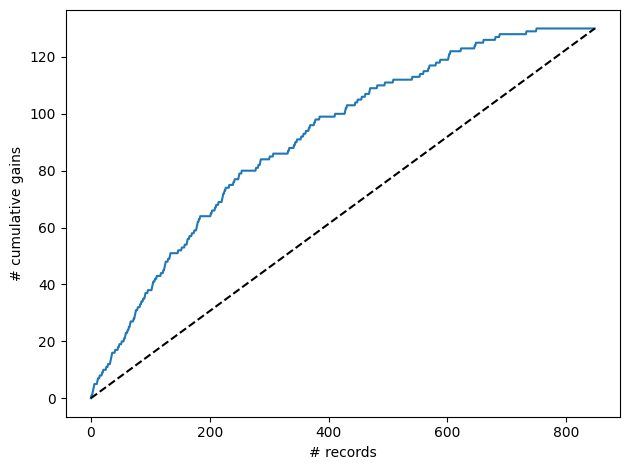

In [41]:
result = pd.DataFrame({'actual': valid_y,
                       'p(0)': [p[0] for p in MLPC_Logi_probas],
                       'p(1)': [p[1] for p in MLPC_Logi_probas],
                       })
result['actual'] = result['actual'].astype('int')
result = result.sort_values(by=['p(1)'], ascending=False)
gainsChart(result.actual)
plt.tight_layout()
plt.show

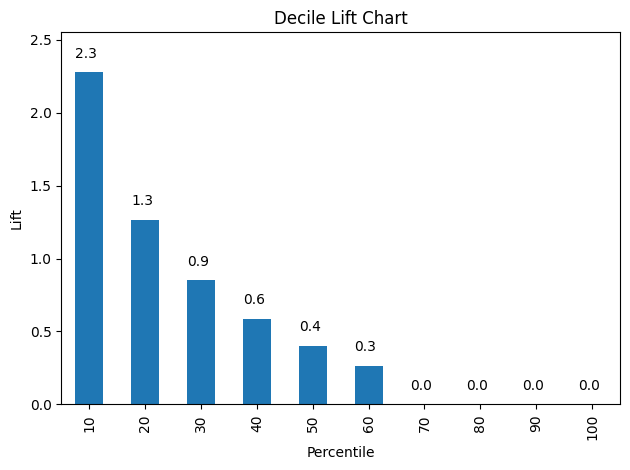

In [42]:
MLPC_Logi_Results = pd.DataFrame({'Predicted': MLPC_Logi_probas_df['Predicted'], 'Actual': valid_y})
liftChart(MLPC_Logi_Results.sort_values(by=['Predicted'], ascending=False).Predicted, labelBars=True, title='Decile Lift Chart')
plt.tight_layout()
plt.show()

#### Looking at the Decile Lift Chart we see that taking the top 10% of the models ranked we get around 2.3 times as many 1's as we would with random selection. 

### (10) (b) Fit a neural network model to the training data. Use grid search to find the optimal number of nodes in the hidden layer. Then train the neural network again with the optimal number of nodes in the hidden layer and find the confusion matrix and accuracy. Use the 'relu' activation function and solver 'adam'.  Create the gains and lift charts for the training and validation sets. Interpret the meaning (in business terms) of the leftmost bar of the validation decile-wise lift chart.  Compare the results with those in (10a) and also discuss which activation function and solver would you use here.

In [43]:
param_grid = {
    'hidden_layer_sizes': [i for i in range(1,20)] 
}
gridSearch = GridSearchCV(MLPClassifier(activation='relu', solver='adam', random_state=1, max_iter=1000), 
                          param_grid, cv=10, n_jobs=-1, return_train_score=True)
gridSearch.fit(train_X_transformed, train_y)
print('Best score: ', gridSearch.best_score_)
print('Best parameters: ', gridSearch.best_params_)
pd.DataFrame(data=gridSearch.cv_results_)

Best score:  0.8522956793336804
Best parameters:  {'hidden_layer_sizes': 5}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.574122,0.078010,0.001299,0.000242,1,{'hidden_layer_sizes': 1},0.847059,0.847059,0.849558,0.849558,...,0.848346,0.848346,0.848346,0.848346,0.848346,0.848346,0.848673,0.848673,0.848467,0.000149
1,0.374853,0.082993,0.001711,0.000741,2,{'hidden_layer_sizes': 2},0.861765,0.832353,0.837758,0.849558,...,0.842450,0.841140,0.844415,0.842123,0.842778,0.843433,0.841140,0.842123,0.842374,0.001191
2,0.346211,0.074499,0.001396,0.000373,3,{'hidden_layer_sizes': 3},0.852941,0.850000,0.843658,0.858407,...,0.854569,0.852276,0.853259,0.853914,0.852276,0.854242,0.855879,0.851949,0.853413,0.001169
3,1.398753,0.257071,0.001600,0.000306,4,{'hidden_layer_sizes': 4},0.847059,0.844118,0.840708,0.855457,...,0.856862,0.855552,0.853914,0.855552,0.852276,0.856535,0.857517,0.855552,0.855542,0.001535
4,0.529269,0.095059,0.001248,0.000516,5,{'hidden_layer_sizes': 5},0.861765,0.855882,0.846608,0.861357,...,0.856207,0.855224,0.857517,0.855224,0.855224,0.856862,0.858172,0.859810,0.856558,0.001545
5,0.695919,0.188532,0.001751,0.001154,6,{'hidden_layer_sizes': 6},0.855882,0.844118,0.831858,0.867257,...,0.858500,0.852932,0.856207,0.855224,0.853259,0.858827,0.857845,0.856207,0.855968,0.001936
6,0.788577,0.183447,0.001357,0.000393,7,{'hidden_layer_sizes': 7},0.861765,0.850000,0.837758,0.870206,...,0.858500,0.854242,0.855879,0.857517,0.856207,0.856862,0.857845,0.854569,0.856558,0.001343
7,0.772404,0.198732,0.001197,0.000684,8,{'hidden_layer_sizes': 8},0.850000,0.838235,0.837758,0.849558,...,0.862758,0.856207,0.857845,0.859482,0.860138,0.856862,0.858500,0.857517,0.858556,0.001825
8,1.043017,0.354821,0.002047,0.001684,9,{'hidden_layer_sizes': 9},0.858824,0.832353,0.837758,0.858407,...,0.857190,0.856535,0.863413,0.861120,0.860138,0.860793,0.862103,0.859155,0.860194,0.002068
9,1.328070,0.291201,0.001903,0.000942,10,{'hidden_layer_sizes': 10},0.858824,0.835294,0.843658,0.858407,...,0.861120,0.856535,0.859155,0.859482,0.860465,0.860138,0.859810,0.859482,0.859768,0.001240


In [44]:
MLPC_Relu = MLPClassifier(hidden_layer_sizes=(5), activation='relu', solver='adam', random_state=1, max_iter=10000)
MLPC_Relu.fit(train_X_transformed, train_y.values)

MLPClassifier(hidden_layer_sizes=5, max_iter=10000, random_state=1)

In [45]:
classificationSummary(train_y, MLPC_Relu.predict(train_X_transformed))

Confusion Matrix (Accuracy 0.8561)

       Prediction
Actual    0    1
     0 2851   27
     1  461   53


In [46]:
classificationSummary(valid_y, MLPC_Relu.predict(valid_X_transformed))

Confusion Matrix (Accuracy 0.8455)

       Prediction
Actual   0   1
     0 710   8
     1 123   7


In [47]:
MLPC_Relu_probas = MLPC_Relu.predict_proba(valid_X_transformed)
MLPC_Relu_probas_df = pd.DataFrame(MLPC_Relu_probas)
MLPC_Relu_probas_df['Predicted'] = MLPC_Relu_probas_df[1]
MLPC_Relu_probas_df = MLPC_Relu_probas_df.drop(columns=[0,1])

<function matplotlib.pyplot.show(close=None, block=None)>

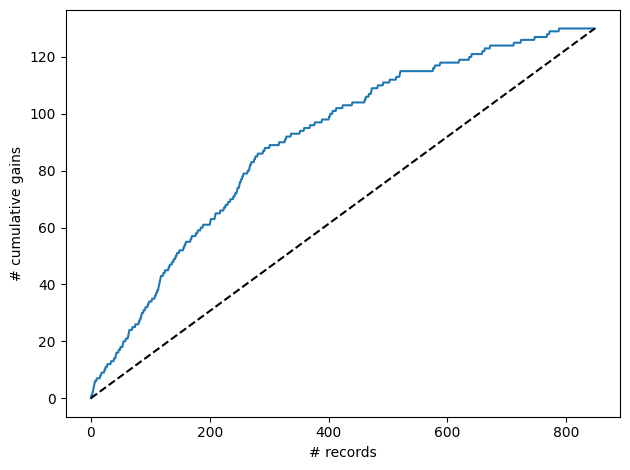

In [48]:
result = pd.DataFrame({'actual': valid_y,
                       'p(0)': [p[0] for p in MLPC_Relu_probas],
                       'p(1)': [p[1] for p in MLPC_Relu_probas],
                       })
result['actual'] = result['actual'].astype('int')
result = result.sort_values(by=['p(1)'], ascending=False)
gainsChart(result.actual)
plt.tight_layout()
plt.show

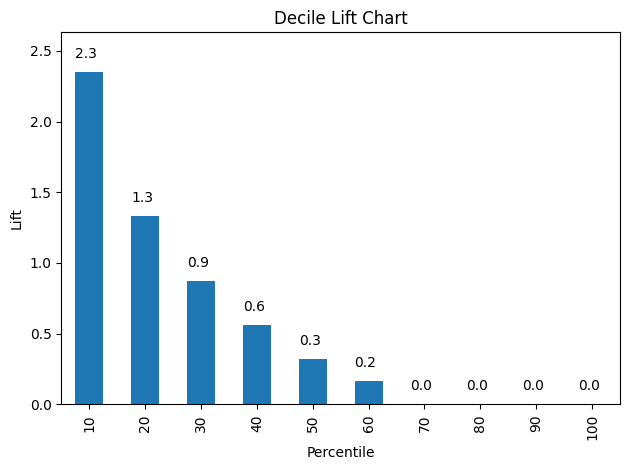

In [49]:
MLPC_Relu_Results = pd.DataFrame({'Predicted': MLPC_Relu_probas_df['Predicted'], 'Actual': valid_y})
liftChart(MLPC_Relu_Results.sort_values(by=['Predicted'], ascending=False).Predicted, labelBars=True, title='Decile Lift Chart')
plt.tight_layout()
plt.show()

#### Looking at the Decile Lift Chart we see that taking the top 10% of the models ranked we get around 2.3 times as many 1's as we would with random selection. Given that the first 4 deciles of the Decile Lift Chart are identical, it may be best to use the Logi activation in this case, given that the next two deciles have higher gains over the relu model. Looking at each models gains chart, I think Logi as also a winner, as it peaks much earlier than the relu model. So in this case I would use a logi activation sequence. 